In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/driver')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/driver


In [0]:
dataset_train = pd.read_csv("/content/driver/My Drive/info1.csv")
training_set = dataset_train.iloc[:,1:2].values


In [0]:
dataset_train.shape

(242, 7)

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
Y_train = []
for i in range(60, len(training_set_scaled)):
  X_train.append(training_set_scaled[i-60:i, 0])
  Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)  


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
regressor = Sequential()

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [0]:
regressor.add(Dense(units = 1))

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
regressor.fit(X_train, Y_train, epochs = 50, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





182/182 [==============================] - 5s 27ms/step - loss: 0.2175
Epoch 2/50
182/182 [==============================] - 1s 8ms/step - loss: 0.0522
Epoch 3/50
182/182 [==============================] - 1s 7ms/step - loss: 0.0434
Epoch 4/50
182/182 [==============================] - 1s 7ms/step - loss: 0.0404
Epoch 5/50
182/182 [==============================] - 1s 7ms/step - loss: 0.0395
Epoch 6/50
182/182 [==============================] - 1s 7ms/step - loss: 0.0359
Epoch 7/50
182/182 [==============================] - 1s 7ms/step - loss: 0.0339
Epoch 8/50
182/182 [==============================] - 1s 7ms/step - loss: 0.0347
Epoch 9/50
182/182 [==============================] - 1s 7ms/step - loss: 0.0363
Epoch 10/50
182/182 [==============================] - 1s 7ms/step - loss: 0.0321
Epoch 11/50
182/182 [==============================] - 1s 7ms/step - loss: 0.0292
Epoc

In [0]:
dataset_test = pd.read_csv("/content/driver/My Drive/info1.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,250):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

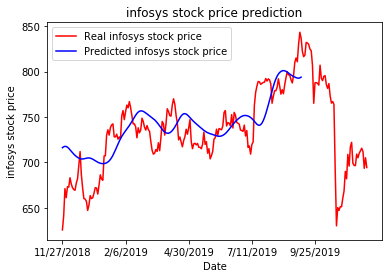

In [0]:
plt.plot(real_stock_price, color = 'red', label = 'Real infosys stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted infosys stock price')
plt.title('infosys stock price prediction')
plt.xlabel('Date')
plt.xticks(np.arange(0,242,50),dataset_train['Date'][0:242:50])
plt.ylabel('infosys stock price')
plt.legend()
plt.show()

In [0]:
#from sklearn.metrics import mean_squared_error
#rm = np.sqrt(mean_squared_error(predicted_stock_price,))
#rm

In [0]:
X_test

array([[[0.74334252],
        [0.7805326 ],
        [0.84710744],
        ...,
        [0.31152433],
        [0.36501377],
        [0.31565657]],

       [[0.7805326 ],
        [0.84710744],
        [0.87006428],
        ...,
        [0.36501377],
        [0.31565657],
        [0.        ]],

       [[0.84710744],
        [0.87006428],
        [0.85055096],
        ...,
        [0.31565657],
        [0.        ],
        [0.07093664]],

       ...,

       [[0.5261708 ],
        [0.59458219],
        [0.60353535],
        ...,
        [0.84710744],
        [0.87006428],
        [0.85055096]],

       [[0.59458219],
        [0.60353535],
        [0.52571166],
        ...,
        [0.87006428],
        [0.85055096],
        [0.93939394]],

       [[0.60353535],
        [0.52571166],
        [0.54338843],
        ...,
        [0.85055096],
        [0.93939394],
        [1.        ]]])